In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

48.86996671478266 165.85533507920843
43.88578578744301 18.2378286772215
48.194761158731154 65.03004824604312
35.88124595429174 132.9247834184696
-70.942594669183 22.42039785996468
8.99792587833015 -107.53168246739585
29.407851581632514 17.31999229422607
-10.327845993522004 -81.11393992823254
36.016293797393615 152.6504025672806
61.67760322313637 -153.97899942426446
81.73943160791322 -102.91942422095251
-77.14189660305837 -112.58223825538172
-26.084970595002467 7.176144615782846
-1.0144730525414332 -10.262148399586266
45.280810726016085 30.54944231305433
-72.30870101662774 -7.08097502171799
-70.75084307535789 172.7319790793136
35.64863517238092 133.3320196661199
79.98442099297017 137.09097764483943
87.65400598102704 157.74491286540353
-69.98317283256516 71.58387585961924
-45.817940661720314 143.5127177040913
-86.62484187106799 115.19750780578687
54.37945505821489 143.99136088394908
33.005002067356685 -116.66982902506517
58.5870394472889 -78.14600458091225
-5.608082246036815 -155.6530553

-81.16325994612282 8.980757798951146
16.684699735530984 156.18088511264574
-13.567477985099458 48.65062118644474
72.29720193483413 -123.09066861352335
-58.972164277092595 28.796621511584846
-43.553700642708364 17.28354837380303
21.023401037151302 154.12192575671912
56.301071176550835 161.2052157776854
14.122591119873519 143.0627562714892
-41.87320736780617 65.39251260089435
33.60645171093509 103.94623609699545
-27.44115546686392 110.70160169200625
-38.031549126879554 68.69839865417146
26.357930352743168 -177.57046398023834
-75.48879101282238 -140.17994276740836
10.98764556717434 -88.94166695475545
1.629525538018683 77.14138372937208
-55.85084011227455 -179.5960939210126
-18.57613520750668 -20.8465761543454
4.331668667772064 -16.100150098305477
61.297948393606305 101.08050231125048
-7.981426889050709 -168.31211378924388
51.19452504730336 -46.991704943650774
48.805293662213444 -127.5125307433525
-12.365171670059283 59.22047702319918
1.4966773757040528 -24.666141956146248
27.1872181718912

50.568863633375514 -38.85633750426638
63.475501743460484 -45.83051259397172
81.67621733538658 -143.09503151993982
83.12761322242582 157.92308495686734
27.005704364070482 -104.76534262438196
45.010226663958605 -74.3037561337656
-21.548761024582888 -172.1417009728933
5.515131213850978 31.43074319362387
71.80126223493608 -179.65313613091803
-23.8454152960407 104.29698218810864
70.5596423219771 -25.84787167035887
-59.480441775478475 -113.7465366335405
29.743794780000485 114.42565243151637
-82.62012057575555 129.71252010521835
29.079346707815517 1.403482333423483
73.00179236151817 -124.85999666361938
-51.49362487266045 40.65566681461107
-84.37717667895984 157.0031091064277
-87.61993678895793 -101.31192446186418
-42.94656583523372 -9.378432861211309
33.82922539005379 -14.385976443924761


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | hadzici
Processing Record 3 of Set 1 | zhezkazgan
Processing Record 4 of Set 1 | sakaiminato
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | lazaro cardenas
Processing Record 7 of Set 1 | waddan
Processing Record 8 of Set 1 | chimbote
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | kenai
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | walvis bay
Processing Record 14 of Set 1 | harper
Processing Record 15 of Set 1 | zatoka
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | new norfolk
Pro

Processing Record 40 of Set 4 | jinchang
Processing Record 41 of Set 4 | paradwip
City not found. Skipping...
Processing Record 42 of Set 4 | kloulklubed
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | margate
Processing Record 45 of Set 4 | fare
Processing Record 46 of Set 4 | fairview
Processing Record 47 of Set 4 | gurskoye
City not found. Skipping...
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | shache
Processing Record 50 of Set 4 | roseburg
Processing Record 1 of Set 5 | asau
Processing Record 2 of Set 5 | khandbari
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | turan
Processing Record 5 of Set 5 | aljezur
Processing Record 6 of Set 5 | srednekolymsk
Processing Record 7 of Set 5 | coro
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | albert
Processing Record 10 of Set 5 | mangan
Processing Record 11 of Set 5 | yumen
Processing Record 12 of Set 5 | monrovia
Proc

Processing Record 31 of Set 8 | san cristobal
Processing Record 32 of Set 8 | ust-ilimsk
Processing Record 33 of Set 8 | ewa beach
Processing Record 34 of Set 8 | wanning
Processing Record 35 of Set 8 | kununurra
Processing Record 36 of Set 8 | salamiyah
Processing Record 37 of Set 8 | udachnyy
Processing Record 38 of Set 8 | manokwari
Processing Record 39 of Set 8 | gizo
Processing Record 40 of Set 8 | teya
Processing Record 41 of Set 8 | zuya
Processing Record 42 of Set 8 | najran
Processing Record 43 of Set 8 | riyadh
Processing Record 44 of Set 8 | eyl
Processing Record 45 of Set 8 | zachagansk
City not found. Skipping...
Processing Record 46 of Set 8 | qiryat shemona
Processing Record 47 of Set 8 | palu
Processing Record 48 of Set 8 | henties bay
Processing Record 49 of Set 8 | nanakuli
Processing Record 50 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 1 of Set 9 | sal rei
Processing Record 2 of Set 9 | sitka
Processing Record 3 of Set 9 | lompoc
Processing Reco

Processing Record 19 of Set 12 | sloboda
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | beloha
Processing Record 22 of Set 12 | kutum
Processing Record 23 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 24 of Set 12 | po
City not found. Skipping...
Processing Record 25 of Set 12 | kalmar
Processing Record 26 of Set 12 | batemans bay
Processing Record 27 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 12 | matadi
Processing Record 29 of Set 12 | talnakh
Processing Record 30 of Set 12 | namatanai
Processing Record 31 of Set 12 | panjab
Processing Record 32 of Set 12 | kuche
City not found. Skipping...
Processing Record 33 of Set 12 | jabiru
City not found. Skipping...
Processing Record 34 of Set 12 | los llanos de aridane
Processing Record 35 of Set 12 | haibowan
City not found. Skipping...
Processing Record 36 of Set 12 | baran
Processing Record 37 of Set 12 | gravdal
Processing Record 38 of Set 12 | kupino
Processin

In [13]:
len(city_data)

563


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,54.79,75,100,7.54,RU,2022-09-14 12:25:39
1,Hadzici,43.8222,18.2067,78.13,47,0,8.05,BA,2022-09-14 12:25:39
2,Zhezkazgan,47.8043,67.7144,67.98,17,0,20.13,KZ,2022-09-14 12:25:40
3,Sakaiminato,35.5500,133.2333,76.98,88,40,19.57,JP,2022-09-14 12:25:40
4,Bredasdorp,-34.5322,20.0403,83.62,22,0,10.49,ZA,2022-09-14 12:25:41
5,Lazaro Cardenas,17.9583,-102.2000,76.06,86,99,4.52,MX,2022-09-14 12:23:48
6,Waddan,29.1614,16.1390,90.46,28,0,2.95,LY,2022-09-14 12:25:41
7,Chimbote,-9.0853,-78.5783,60.46,84,96,6.67,PE,2022-09-14 12:25:42
8,Kenai,60.5544,-151.2583,45.09,97,20,3.44,US,2022-09-14 12:25:43
9,Yellowknife,62.4560,-114.3525,41.56,93,20,4.61,CA,2022-09-14 12:25:00


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country"]
city_data_df = city_data_df[new_column_order]
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Nikolskoye,RU,2022-09-14 12:25:39,59.7035,30.7861,54.79,75,100,7.54,RU
1,Hadzici,BA,2022-09-14 12:25:39,43.8222,18.2067,78.13,47,0,8.05,BA
2,Zhezkazgan,KZ,2022-09-14 12:25:40,47.8043,67.7144,67.98,17,0,20.13,KZ
3,Sakaiminato,JP,2022-09-14 12:25:40,35.5500,133.2333,76.98,88,40,19.57,JP
4,Bredasdorp,ZA,2022-09-14 12:25:41,-34.5322,20.0403,83.62,22,0,10.49,ZA
...,...,...,...,...,...,...,...,...,...,...
558,Huntingdon,GB,2022-09-14 12:37:38,52.3305,-0.1865,71.80,40,42,5.97,GB
559,Pangai,TO,2022-09-14 12:42:07,-19.8000,-174.3500,77.11,78,40,13.80,TO
560,Juba,SS,2022-09-14 12:42:07,4.8517,31.5825,91.06,41,46,3.96,SS
561,Puqi,CN,2022-09-14 12:42:08,29.7167,113.8833,79.29,51,97,9.51,CN


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

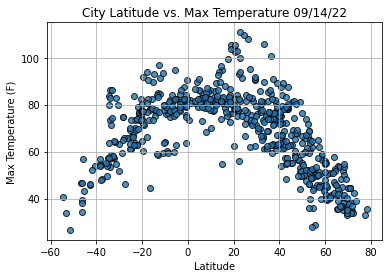

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()